


# Vamos encher o carrinho!

# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [1]:
# Importe as bibliotecas
import pandas as pd

In [2]:
# leia os conjuntos de dados em DataFrames
orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products_df = pd.read_csv('/datasets/products.csv', sep=';')
order_products_df = pd.read_csv('/datasets/order_products.csv', sep=';')
aisles_df = pd.read_csv('/datasets/aisles.csv', sep=';')
departments_df = pd.read_csv('/datasets/departments.csv', sep=';')

In [3]:
#Corrigido V2
# imprima as informações sobre o DataFrame


print("Shape of the order_products_df DataFrame:", order_products_df.shape)
display(order_products_df.head())

Shape of the order_products_df DataFrame: (4545007, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [4]:
# imprima as informações sobre o DataFrame

print('Informações sobre o DataFrame products.csv:')
products_df.info()
print('\\n' + '-'*50 + '\\n')


Informações sobre o DataFrame products.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
\n--------------------------------------------------\n


In [5]:
# imprima as informações sobre o DataFrame
# informações sobre o DataFrame de corredores
print('Informações sobre o DataFrame aisles.csv:')
aisles_df.info()
print('\\n' + '-'*50 + '\\n')

Informações sobre o DataFrame aisles.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
\n--------------------------------------------------\n


In [6]:
# imprima as informações sobre o DataFrame
# informações sobre o DataFrame de departamentos
print('Informações sobre o DataFrame departments.csv:')
departments_df.info()
print('\\n' + '-'*50 + '\\n')

Informações sobre o DataFrame departments.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
\n--------------------------------------------------\n


In [7]:
# imprima as informações sobre o DataFrame

# informações sobre o DataFrame de produtos de pedidos
print('Informações sobre o DataFrame order_products.csv:')
order_products_df.info()

Informações sobre o DataFrame order_products.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados

Em resumo, a Etapa 1 nos permitiu carregar os dados corretamente e identificar a presença de valores ausentes nas colunas days_since_prior_order em orders_df e product_name em products_df.

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados

O foco é a limpeza e preparação dos dados. Um conjunto de dados limpo e bem estruturado é a base para qualquer análise confiável. Portanto, vou executar três processos essenciais:
1. Verificar e corrigir os tipos de dados: Garantir que cada coluna esteja no formato correto (ex: IDs como números inteiros).
2. Tratar valores ausentes: Identificar dados faltantes e aplicar uma estratégia lógica para preenchê-los ou removê-los.
3. Remover duplicatas: Encontrar e eliminar registros repetidos que poderiam distorcer nossas análises.


## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [8]:
# Verifique se há linhas duplicadas completas em orders_df
print("Número de linhas duplicadas em orders_df:", orders_df.duplicated().sum())

# Remova linhas duplicadas completas
orders_df = orders_df.drop_duplicates()

# Verifique novamente para confirmar a remoção
print("Número de linhas duplicadas em orders_df após remoção:", orders_df.duplicated().sum())

Número de linhas duplicadas em orders_df: 15
Número de linhas duplicadas em orders_df após remoção: 0


Há linhas duplicadas? Se sim, o que elas têm em comum?

Sim, havia 15 linhas duplicadas completas no orders_df. Elas tinham em comum os mesmos valores em todas as colunas.

In [9]:
# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

# Filtrar pedidos feitos às 2h da manhã (order_hour_of_day = 2) nas quartas-feiras (order_dow = 3)
wednesday_2am_orders = orders_df[(orders_df['order_dow'] == 3) & (orders_df['order_hour_of_day'] == 2)]

# Exibir o número de pedidos encontrados
print("Número de pedidos feitos às 2h da manhã nas quartas-feiras:", len(wednesday_2am_orders))

# Exibir as primeiras linhas do DataFrame filtrado (opcional)
display(wednesday_2am_orders.head())

Número de pedidos feitos às 2h da manhã nas quartas-feiras: 106


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0


O que esse resultado quer dizer?

as linhas duplicadas no instacart_orders.csv ocorriam justamente neste horário (2h da manhã de quarta-feira).

In [10]:
#corrigido

# Verificar pedidos duplicados baseados no order_id
duplicate_orders = orders_df[orders_df.duplicated(subset=['order_id'], keep=False)]

if not duplicate_orders.empty:
    print("Pedidos duplicados encontrados:")
    print(duplicate_orders.sort_values('order_id'))
else:
    print("Nenhum pedido duplicado encontrado.")

# Remover pedidos duplicados, mantendo a primeira ocorrência
orders_df = orders_df.drop_duplicates(subset=['order_id'], keep='first').reset_index(drop=True) #corrigido

# Verificar o resultado
print("\nQuantidade de pedidos após remoção de duplicatas:", len(orders_df))

Nenhum pedido duplicado encontrado.

Quantidade de pedidos após remoção de duplicatas: 478952


In [11]:
#Corrigido V2
# Verifique as linhas duplicadas mais uma vez

# Verificar duplicatas baseadas em 'order_id' após a limpeza
duplicates_check = orders_df[orders_df.duplicated(subset=['order_id'], keep=False)]

if not duplicates_check.empty:
    print("Ainda existem pedidos duplicados:")
    print(duplicates_check.sort_values('order_id'))
else:
    print("Não há mais pedidos duplicados no DataFrame.")

Não há mais pedidos duplicados no DataFrame.


In [12]:
# Verifique novamente apenas os IDs de pedidos duplicados

# Verifica se há order_id repetidos (sem considerar outras colunas)
duplicate_order_ids = orders_df['order_id'].duplicated(keep=False)

# Filtra o DataFrame para mostrar apenas os pedidos com order_id duplicado
duplicated_orders = orders_df[duplicate_order_ids].sort_values('order_id')

if not duplicated_orders.empty:
    print(f"Existem {len(duplicated_orders)} registros com order_id duplicado:")
    print(duplicated_orders)
else:
    print("Não há order_id duplicados no DataFrame.")

Não há order_id duplicados no DataFrame.




Descreva brevemente suas conclusões e o que você fez com elas.

1. Identifiquei que existem 30 pedidos com order_id duplicado no dataset original.
2. Observei que esses pedidos duplicados parecem ocorrer predominantemente em um horário específico: 2h da manhã das quartas-feiras.
O que fiz:
1. Gerei código para identificar essas linhas duplicadas, mostrando exemplos para visualização.
2. Gerei código para remover os pedidos duplicados com base no order_id, mantendo a primeira ocorrência encontrada


### DataFrame `products`

In [13]:
#corrigido

# Verifique se há linhas completamente duplicadas
duplicated_rows = products_df[products_df.duplicated(keep=False)]

if not duplicated_rows.empty:
    print(f"Existem {len(duplicated_rows)} linhas totalmente duplicadas:")
    print(duplicated_rows.sort_values('product_id'))
else:
    print("Não há linhas totalmente duplicadas em 'products'.")

duplicate_ids = products_df['product_id'].duplicated(keep=False)

if duplicate_ids.any():
    print(f"Existem {duplicate_ids.sum()} product_ids duplicados:")
    print(products_df[duplicate_ids].sort_values('product_id'))
else:
    print("Todos os product_ids são únicos.")

Não há linhas totalmente duplicadas em 'products'.
Todos os product_ids são únicos.


In [14]:
#Corrigido V2
# Verifique apenas IDs dos produtos duplicados
duplicate_ids = products_df['product_id'].duplicated(keep=False)

if duplicate_ids.any():
    print(f"Existem {duplicate_ids.sum()} product_ids duplicados:")
    print(products_df[duplicate_ids].sort_values('product_id'))
else:
    print("Todos os product_ids são únicos.")

Todos os product_ids são únicos.


In [15]:
# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
# Convert product names to lowercase for better comparison
products_df['product_name_lower'] = products_df['product_name'].str.lower()

# Check for duplicate product names (case-insensitive)
duplicate_names_lower = products_df[products_df.duplicated(subset=['product_name_lower'], keep=False)]

if not duplicate_names_lower.empty:
    print(f"Existem {len(duplicate_names_lower)} registros com nomes de produtos duplicados (ignorando maiúsculas/minúsculas):")
    # Display relevant columns for duplicated names
    # Exibe colunas relevantes para nomes duplicados
    display(duplicate_names_lower[['product_id', 'product_name', 'product_name_lower']].sort_values('product_name_lower'))

    print("\nContagem dos nomes de produtos duplicados:") # Contagem dos nomes de produtos duplicados:
    display(duplicate_names_lower['product_name_lower'].value_counts())

    # Optional: Drop the temporary lowercase column if no longer needed
    # Opcional: Remove a coluna temporária em minúsculas se não for mais necessária
    # products = products.drop(columns=['product_name_lower'])
else:
    print("Não há nomes de produtos duplicados (ignorando maiúsculas/minúsculas) no DataFrame 'products'.") # Não há nomes de produtos duplicados (ignorando maiúsculas/minúsculas) no DataFrame 'products'.

Existem 1465 registros com nomes de produtos duplicados (ignorando maiúsculas/minúsculas):


,product_id,product_name,product_name_lower
23339,23340,18-in-1 Hemp Peppermint Pure-Castile Soap,18-in-1 hemp peppermint pure-castile soap
31844,31845,18-In-1 Hemp Peppermint Pure-Castile Soap,18-in-1 hemp peppermint pure-castile soap
19941,19942,Aged Balsamic Vinegar Of Modena,aged balsamic vinegar of modena
13152,13153,Aged Balsamic Vinegar of Modena,aged balsamic vinegar of modena
24830,24831,Albacore Solid White Tuna in Water,albacore solid white tuna in water
...,...,...,...
49552,49553,NaN,NaN
49574,49575,NaN,NaN
49640,49641,NaN,NaN
49663,49664,NaN,NaN



Contagem dos nomes de produtos duplicados:


green tea with ginseng and honey                            3
original pancake & waffle mix                               2
skinless & boneless sardines in olive oil                   2
herring in wine sauce                                       2
gentle and predictable overnight relief laxative tablets    2
                                                           ..
mediterranean sea salt                                      2
chopped garlic in water                                     2
ultragel personal lubricant                                 2
chili with beans                                            2
premium lubricant condoms enz                               2
Name: product_name_lower, Length: 103, dtype: int64

In [16]:
#corrigido

try:
    products_df
except NameError:
    # products_df = pd.read_csv('products.csv', sep=';') # Não é necessário carregar novamente #corrigido
    pass # Garante que a variável products_df existe, mas sem recarregar

# Verifique os nomes de produtos duplicados que não estão faltando
products_clean = products_df[products_df['product_name'].notna()].copy()

# Criar uma coluna com nomes limpos (minúsculas e sem espaços extras)
products_clean.loc[:, 'clean_name'] = products_clean['product_name'].str.lower().str.strip()

# Verificar duplicatas na coluna 'clean_name'
duplicate_names = products_clean[products_clean.duplicated('clean_name', keep=False)]

if not duplicate_names.empty:
    print(f"Produtos com nomes duplicados válidos ({len(duplicate_names)}):")
    result = duplicate_names.sort_values('clean_name')[['product_id', 'product_name']]
    print(result)
    print("\nNomes mais repetidos:")
    print(duplicate_names['clean_name'].value_counts().head(10))
else:
    print("Nenhum nome duplicado válido encontrado.")

# Opcional: remover a coluna temporária 'clean_name' se não for mais necessária
# products_clean = products_clean.drop(columns=['clean_name'])

Produtos com nomes duplicados válidos (207):
       product_id                               product_name
23339       23340  18-in-1 Hemp Peppermint Pure-Castile Soap
31844       31845  18-In-1 Hemp Peppermint Pure-Castile Soap
19941       19942            Aged Balsamic Vinegar Of Modena
13152       13153            Aged Balsamic Vinegar of Modena
24830       24831         Albacore Solid White Tuna in Water
...           ...                                        ...
46873       46874                         Vitamin D3 5000 IU
21366       21367              Wild Sardines in Spring Water
40093       40094              Wild Sardines In Spring Water
1826         1827           Yams Cut Sweet Potatoes in Syrup
38260       38261           Yams Cut Sweet Potatoes In Syrup

[207 rows x 2 columns]

Nomes mais repetidos:
green tea with ginseng and honey                            3
vitamin d3 2000 iu                                          2
skinless & boneless sardines in olive oil           

Descreva brevemente suas conclusões e o que você fez com elas.
Verifiquei nomes de produtos que não estavam faltando.
Mesmo entre os produtos com nomes válidos, identifiquei nomes duplicados (considerando minúsculas e removendo espaços extras).
Essas duplicatas provavelmente são variaçoes do mesmo nome de produto (ex: "Maçã" e "maçã") ou nomes idênticos para produtos diferentes.
O que fiz:

Criei uma cópia temporária do DataFrame products excluindo linhas onde o nome do produto estava faltando.
Adicionei uma nova coluna (clean_name) com os nomes dos produtos convertidos para minúsculas e sem espaços extras no início ou fim, para facilitar a comparação.
Gerei código para identificar e exibir os produtos que tinham nomes duplicados nesta coluna clean_name.
O resultado mostrou a lista de produtos com nomes duplicados válidos e a contagem dos nomes mais repetidos.

### DataFrame `departments`

In [17]:
# Verifique se há linhas completamente duplicadas

#Corrigido

# Verifica linhas duplicadas
duplicated_depts = departments_df[departments_df.duplicated(keep=False)]

if not duplicated_depts.empty:
    print(f"Departamentos duplicados encontrados ({len(duplicated_depts)} linhas):")
    print(duplicated_depts.sort_values('department_id'))
else:
    print("Nenhuma linha duplicada encontrada em 'departments'.")

Nenhuma linha duplicada encontrada em 'departments'.


In [18]:
# Verifique apenas se há IDs dos produtos duplicados

#Corrigido

# Verificar se há IDs de departamentos duplicados
duplicate_department_ids = departments_df[departments_df.duplicated(subset=['department_id'], keep=False)]

if not duplicate_department_ids.empty:
    print(f"Existem {len(duplicate_department_ids)} registros com department_id duplicado:")
    print(duplicate_department_ids.sort_values('department_id'))
else:
    print("Não há department_ids duplicados no DataFrame 'departments'.")

# Verificar se há linhas completamente duplicadas também (já que recarregamos)
duplicated_depts_full = departments_df[departments_df.duplicated(keep=False)]
if not duplicated_depts_full.empty:
     print(f"\nDepartamentos duplicados encontrados (linhas completas):")
     print(duplicated_depts_full)
else:
    print("\nNenhuma linha completamente duplicada encontrada em 'departments' após recarga.")

Não há department_ids duplicados no DataFrame 'departments'.

Nenhuma linha completamente duplicada encontrada em 'departments' após recarga.


Descreva brevemente suas conclusões e o que você fez com elas.

As análises confirmaram a unicidade dos IDs de departamento e a ausência de linhas duplicadas neste DataFrame.

### DataFrame `aisles`

In [19]:
# Verifique se há linhas completamente duplicadas
#Corrigido

# Verifica linhas duplicadas
duplicated_aisles = aisles_df[aisles_df.duplicated(keep=False)]

if not duplicated_aisles.empty:
    print(f"Linhas duplicadas encontradas ({len(duplicated_aisles)}):")
    print(duplicated_aisles.sort_values('aisle_id'))
else:
    print("Nenhuma linha duplicada encontrada em 'aisles'.")

Nenhuma linha duplicada encontrada em 'aisles'.


In [20]:
#Corrigido V2
# Verifique apenas se há IDs dos produtos duplicados

print("Colunas disponíveis em 'aisles_df':", aisles_df.columns.tolist())

# Verifique se há IDs duplicados na coluna que parece ser o ID do corredor
# Assumindo que a coluna de ID é a primeira ou tem 'aisle_id' no nome
id_column = 'aisle_id'
if id_column not in aisles_df.columns:
    # Se 'aisle_id' não for encontrada, tenta a primeira coluna ou a que contém 'aisle_id' (ajustar conforme o nome real)
    potential_id_cols = [col for col in aisles_df.columns if 'aisle_id' in col.lower()]
    if potential_id_cols:
        id_column = potential_id_cols[0]
    else:
        # Fallback para a primeira coluna se nenhuma coluna com 'aisle_id' for encontrada
        id_column = aisles_df.columns[0]

print(f"Verificando duplicatas na coluna: '{id_column}'")

duplicate_ids = aisles_df.duplicated(subset=[id_column], keep=False)

if duplicate_ids.any():
    print(f"\nIDs duplicados encontrados ({duplicate_ids.sum()}):")
    print(aisles_df.loc[duplicate_ids].sort_values(id_column))
else:
    print("\nNenhum ID duplicado encontrado.")

Colunas disponíveis em 'aisles_df': ['aisle_id', 'aisle']
Verificando duplicatas na coluna: 'aisle_id'

Nenhum ID duplicado encontrado.


Descreva brevemente suas conclusões e o que você fez com elas.
As análises confirmaram valores unicos dos IDs de corredor e a ausência de linhas duplicadas neste DataFrame.

### DataFrame `order_products`

In [21]:
# Verifique se há linhas completamente duplicadas

#Corrigido

# Verificar se há linhas completamente duplicadas
duplicate_rows = order_products_df[order_products_df.duplicated(keep=False)]

if not duplicate_rows.empty:
    print(f"Linhas completamente duplicadas encontradas ({len(duplicate_rows)}):")
    print(duplicate_rows.sort_values(['order_id', 'product_id']))
else:
    print("Nenhuma linha completamente duplicada encontrada.")

Nenhuma linha completamente duplicada encontrada.


In [22]:
#Corrigido

# 2. verifique as colunas
print("Colunas disponíveis:", order_products_df.columns.tolist())

# 3. Continuar com as verificações
required_cols = ['order_id', 'product_id', 'add_to_cart_order', 'reordered']
if all(col in order_products_df.columns for col in required_cols):

    # Caso 1: Produtos repetidos no mesmo pedido
    dup_case1 = order_products_df.groupby(['order_id', 'product_id']).size().reset_index(name='count')
    dup_case1 = dup_case1[dup_case1['count'] > 1]

    if not dup_case1.empty:
        print("\nCaso 1: Produtos repetidos no mesmo pedido encontrados.")
        print(f"Total: {len(dup_case1)} combinações order_id+product_id")
        print(dup_case1.head(3))
    else:
        print("\nCaso 1: OK - Sem produtos repetidos no mesmo pedido")

    # Caso 2: Sequência de carrinho inconsistente
    dup_case2 = order_products_df[order_products_df.duplicated(['order_id', 'add_to_cart_order'], keep=False)]

    if not dup_case2.empty:
        print("\nCaso 2: Sequência de adição ao carrinho inconsistente")
        print(f"Total: {len(dup_case2)} linhas com problemas")
        print(dup_case2.sort_values(['order_id', 'add_to_cart_order']).head())
    else:
        print("\nCaso 2: OK - Sequência de carrinho consistente")

    # Caso 3: Status reordered inconsistente
    dup_case3 = order_products_df.groupby('product_id')['reordered'].nunique()
    dup_case3 = dup_case3[dup_case3 > 1].reset_index(name='inconsistencias')

    if not dup_case3.empty:
        print("\nCaso 3: Status 'reordered' inconsistente")
        print(f"Total: {len(dup_case3)} produtos com inconsistência")
        print(dup_case3.head(3))
    else:
        print("\nCaso 3: OK - Status 'reordered' consistente")

else:
    print("\nErro: Faltam colunas necessárias")
    print("Colunas necessárias:", required_cols)
    print("Colunas encontradas:", order_products_df.columns.tolist())

Colunas disponíveis: ['order_id', 'product_id', 'add_to_cart_order', 'reordered']

Caso 1: OK - Sem produtos repetidos no mesmo pedido

Caso 2: Sequência de adição ao carrinho inconsistente
Total: 827 linhas com problemas
        order_id  product_id  add_to_cart_order  reordered
57981      61355        5322                NaN          0
247893     61355        8594                NaN          0
381535     61355       12315                NaN          0
399791     61355       10199                NaN          0
427017     61355        5552                NaN          0

Caso 3: Status 'reordered' inconsistente
Total: 34419 produtos com inconsistência
   product_id  inconsistencias
0           1                2
1           3                2
2           4                2


Descreva brevemente suas conclusões e o que você fez com elas.

Verifiquei casos mais complexos de duplicatas e inconsistências.
Confirmei que não há produtos repetidos dentro do mesmo pedido (cada combinação order_id + product_id é única).
Identifiquei inconsistências significativas na coluna add_to_cart_order (Caso 2), principalmente com valores NaN causando duplicatas na posição de adição ao carrinho para alguns pedidos.
Identifiquei inconsistências no status reordered (Caso 3) para muitos produtos, onde o mesmo product_id aparece com status 0 (não reordenado) e 1 (reordenado) em diferentes linhas.
O que fiz:

Gerei código para agrupar os dados e verificar a contagem de combinações order_id + product_id para identificar produtos repetidos no mesmo pedido.
Gerei código para verificar duplicatas na combinação order_id + add_to_cart_order para identificar inconsistências na sequência de adição ao carrinho.
Gerei código para agrupar por product_id e verificar a variedade de valores na coluna reordered para identificar inconsistências no status de reordenamento.
Exibi os resultados dessas verificações, destacando os casos onde as inconsistências foram encontradas (Caso 2 e Caso 3).
Agora que sei essas inconsistências, posso focar em como tratá-las.

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [23]:
# Encontre valores ausentes na coluna 'product_name'
# Verifique valores ausentes na coluna 'product_name'
missing_product_names = products_df['product_name'].isnull()

# Conte o total de valores ausentes
total_missing_names = missing_product_names.sum()

print(f"Total de valores ausentes na coluna 'product_name': {total_missing_names}")

# Opcional: Exibir as linhas com valores ausentes em 'product_name'
if total_missing_names > 0:
    print("\nExemplo de linhas com 'product_name' ausente:")
    display(products_df[missing_product_names].head())
else:
    print("\nNão há valores ausentes na coluna 'product_name'.")

Total de valores ausentes na coluna 'product_name': 1258

Exemplo de linhas com 'product_name' ausente:


,product_id,product_name,aisle_id,department_id,product_name_lower
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN


Descreva brevemente suas conclusões.
Isso conclui a identificação dos valores ausentes na coluna de nomes de produtos. O próximo passo seria decidir como lidar com eles

In [24]:
# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?

# Filtrar produtos com nomes ausentes
missing_names_products = products_df[products_df['product_name'].isnull()]

# Verificar se todos esses produtos estão associados ao aisle_id 100
all_aisle_100 = (missing_names_products['aisle_id'] == 100).all()

if all_aisle_100:
    print("Sim, todos os produtos com nomes ausentes estão associados ao corredor de ID 100.")
else:
    print(" Não, nem todos os produtos com nomes ausentes estão associados ao corredor de ID 100.")
    # Opcional: Mostrar outros aisle_ids se existirem
    other_aisle_ids = missing_names_products['aisle_id'].unique()
    if len(other_aisle_ids) > 1:
        print("\nOutros IDs de corredor encontrados para produtos com nomes ausentes:")
        print(other_aisle_ids)

Sim, todos os produtos com nomes ausentes estão associados ao corredor de ID 100.


Descreva brevemente suas conclusões.
Descobri que todos os 1258 produtos com nomes ausentes estão associados exclusivamente ao corredor de ID 100.

In [25]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21

# Filtrar produtos com nomes ausentes (usando o DataFrame 'products' original)
missing_names_products = products_df[products_df['product_name'].isnull()]

# Verificar se todos esses produtos estão associados ao department_id 21
all_dept_21 = (missing_names_products['department_id'] == 21).all()

if all_dept_21:
    print("Sim, todos os produtos com nomes ausentes estão associados ao departamento de ID 21.")
else:
    print("Não, nem todos os produtos com nomes ausentes estão associados ao departamento de ID 21.")
    # Opcional: Mostrar outros department_ids se existirem
    other_dept_ids = missing_names_products['department_id'].unique()
    if len(other_dept_ids) > 1:
        print("\nOutros IDs de departamento encontrados para produtos com nomes ausentes:")
        print(other_dept_ids)

Sim, todos os produtos com nomes ausentes estão associados ao departamento de ID 21.


Descreva brevemente suas conclusões.
Descobri que todos os 1258 produtos com nomes ausentes estão associados exclusivamente ao departamento de ID 21.
Essa forte correlação entre a ausência de nome e os IDs específicos de corredor e departamento "missing" sugere que esses são itens cuja informação detalhada não foi registrada no dataset.

In [26]:
#Corrigido V2
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.
# Verificar informações do corredor com ID 100 no DataFrame aisles
aisle_100_info = aisles_df[aisles_df['aisle_id'] == 100]

print("Informações para o Corredor com ID 100:")
if not aisle_100_info.empty:
    display(aisle_100_info)
else:
    print("Corredor com ID 100 não encontrado ou formato da coluna incorreto.")

# Verificar informações do departamento com ID 21 no DataFrame departments
department_21_info = departments_df[departments_df['department_id'] == 21]

print("\nInformações para o Departamento com ID 21:")
if not department_21_info.empty:
    display(department_21_info)
else:
    print("Departamento com ID 21 não encontrado.")

Informações para o Corredor com ID 100:


,aisle_id,aisle
99,100,missing



Informações para o Departamento com ID 21:


,department_id,department
20,21,missing


Descreva brevemente suas conclusões.
Essas verificações me deu um contexto importante sobre a natureza dos valores ausentes nos nomes dos produtos.

In [27]:
# Preencha nomes de produtos ausentes com 'Unknown'
# Preencher valores ausentes na coluna 'product_name' com 'Unknown'
products_df['product_name'] = products_df['product_name'].fillna('Unknown')

# Verificar se ainda há valores ausentes na coluna 'product_name'
missing_product_names_after_fill = products_df['product_name'].isnull().sum()

print(f"Total de valores ausentes na coluna 'product_name' após preenchimento: {missing_product_names_after_fill}")

Total de valores ausentes na coluna 'product_name' após preenchimento: 0


Descreva brevemente suas conclusões e o que você fez com elas.

garanti que não há mais valores ausentes na coluna product_name, substituindo as entradas em branco por um valor placeholder que indica que o nome original era desconhecido.

#DataFrame `orders`

In [28]:
#Corrigido V2
# Encontre os valores ausentes

#Corrigido

# Encontrar valores ausentes em todas as colunas do DataFrame 'orders'
missing_values_orders = orders_df.isnull().sum()

print("Valores ausentes no DataFrame 'orders':")
print(missing_values_orders)

# Opcional: Exibir a porcentagem de valores ausentes
print("\nPorcentagem de valores ausentes no DataFrame 'orders':")
print((missing_values_orders / len(orders_df)) * 100)

Valores ausentes no DataFrame 'orders':
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

Porcentagem de valores ausentes no DataFrame 'orders':
order_id                  0.000000
user_id                   0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.016678
dtype: float64


In [29]:
#Corrigido V2
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?

# Filtrar pedidos onde 'days_since_prior_order' é ausente
missing_days = orders_df[orders_df['days_since_prior_order'].isnull()]

# Verificar se algum desses pedidos ausentes NÃO é o primeiro pedido (order_number > 1)
non_first_orders_with_missing_days = missing_days[missing_days['order_number'] > 1]

if not non_first_orders_with_missing_days.empty:
    print("ALERTA: Foram encontrados pedidos com 'days_since_prior_order' ausente que NÃO são o primeiro pedido.")
    print(f"Total de casos: {len(non_first_orders_with_missing_days)}")
    print("Exemplo:")
    display(non_first_orders_with_missing_days.head())
else:
    print("Não foram encontrados pedidos com 'days_since_prior_order' ausente que NÃO sejam o primeiro pedido.")
    print("Isso confirma que os valores ausentes em 'days_since_prior_order' correspondem aos primeiros pedidos (order_number = 1).")

Não foram encontrados pedidos com 'days_since_prior_order' ausente que NÃO sejam o primeiro pedido.
Isso confirma que os valores ausentes em 'days_since_prior_order' correspondem aos primeiros pedidos (order_number = 1).


Descreva brevemente suas conclusões e o que você fez com elas.
Essa análise nos deu confiança de que os valores ausentes em days_since_prior_order são intencionais e indicam o primeiro pedido de um usuário, o que é uma informação valiosa para a análise.

### DataFrame `order_products`

In [30]:
# Encontre os valores ausentes
# Encontrar valores ausentes em todas as colunas do DataFrame 'order_products'
missing_values_order_products = order_products_df.isnull().sum()

print("Valores ausentes no DataFrame 'order_products':")
print(missing_values_order_products)

# Exibir a porcentagem de valores ausentes
print("\nPorcentagem de valores ausentes no DataFrame 'order_products':")
print((missing_values_order_products / len(order_products_df)) * 100)

Valores ausentes no DataFrame 'order_products':
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

Porcentagem de valores ausentes no DataFrame 'order_products':
order_id             0.000000
product_id           0.000000
add_to_cart_order    0.018394
reordered            0.000000
dtype: float64


In [31]:
# Quais são os valores mínimo e máximo dessa coluna?

#Corrigido

# Encontrar os valores mínimo e máximo da coluna 'add_to_cart_order'
min_add_to_cart = order_products_df['add_to_cart_order'].min()
max_add_to_cart = order_products_df['add_to_cart_order'].max()

print(f"Valor mínimo na coluna 'add_to_cart_order': {min_add_to_cart}")
print(f"Valor máximo na coluna 'add_to_cart_order': {max_add_to_cart}")

Valor mínimo na coluna 'add_to_cart_order': 1.0
Valor máximo na coluna 'add_to_cart_order': 64.0


Descreva brevemente suas conclusões.
Essas análises ajudou a quantificar a extensão dos valores ausentes e a entender a distribuição dos valores existentes na coluna

In [32]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'

# Filtrar as linhas onde 'add_to_cart_order' é ausente
orders_with_missing_add_to_cart = order_products_df[order_products_df['add_to_cart_order'].isnull()]

# Obter os IDs únicos dos pedidos dessas linhas
order_ids_with_missing_add_to_cart = orders_with_missing_add_to_cart['order_id'].unique()

# Opcional: Salvar os IDs em uma lista ou DataFrame
# saved_order_ids_list = order_ids_with_missing_add_to_cart.tolist()
# saved_order_ids_df = pd.DataFrame({'order_id_with_missing_add_to_cart': order_ids_with_missing_add_to_cart})

print(f"Total de pedidos com pelo menos um valor ausente em 'add_to_cart_order': {len(order_ids_with_missing_add_to_cart)}")
print("\nPrimeiros 10 IDs de pedidos com valor ausente em 'add_to_cart_order':")
print(order_ids_with_missing_add_to_cart[:10])

Total de pedidos com pelo menos um valor ausente em 'add_to_cart_order': 70

Primeiros 10 IDs de pedidos com valor ausente em 'add_to_cart_order':
[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093]


In [33]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'

# Filtrar as linhas onde 'add_to_cart_order' é ausente
orders_with_missing_add_to_cart = order_products_df[order_products_df['add_to_cart_order'].isnull()]

# Obter os IDs únicos dos pedidos dessas linhas
order_ids_with_missing_add_to_cart = orders_with_missing_add_to_cart['order_id'].unique()

# Opcional: Salvar os IDs em uma lista ou DataFrame
# saved_order_ids_list = order_ids_with_missing_add_to_cart.tolist()
# saved_order_ids_df = pd.DataFrame({'order_id_with_missing_add_to_cart': order_ids_with_missing_add_to_cart})

print(f"Total de pedidos com pelo menos um valor ausente em 'add_to_cart_order': {len(order_ids_with_missing_add_to_cart)}")
print("\nPrimeiros 10 IDs de pedidos com valor ausente em 'add_to_cart_order':")
print(order_ids_with_missing_add_to_cart[:10])

Total de pedidos com pelo menos um valor ausente em 'add_to_cart_order': 70

Primeiros 10 IDs de pedidos com valor ausente em 'add_to_cart_order':
[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093]


Descreva brevemente suas conclusões.
Contei quantos produtos estão incluídos em cada pedido individual no dataset.
Descobri que o número mínimo de produtos em um único pedido é 1.
O que fiz:

Gerei código para agrupar o DataFrame order_products por order_id e contar o número de linhas em cada grupo (que representa a contagem de produtos por pedido).
Calculei o valor mínimo dessa contagem.
Exibi o valor mínimo encontrado.
Isso mostra que o dataset inclui pedidos de tamanho pequeno, com apenas um item

In [34]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

# Substituir valores ausentes na coluna 'add_to_cart_order' por 999
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(999)

# Converter a coluna 'add_to_cart_order' para o tipo integer
# Usamos .astype(int) após garantir que não há mais NaNs
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype(int)

# Verificar se há valores ausentes após o preenchimento (deve ser 0)
missing_add_to_cart_after_fill = order_products_df['add_to_cart_order'].isnull().sum()
print(f"Valores ausentes em 'add_to_cart_order' após preenchimento: {missing_add_to_cart_after_fill}")

# Verificar o tipo de dado da coluna
print(f"Tipo de dado da coluna 'add_to_cart_order' após conversão: {order_products_df['add_to_cart_order'].dtype}")

# Opcional: Exibir as primeiras linhas para ver a mudança
# display(order_products.head())

Valores ausentes em 'add_to_cart_order' após preenchimento: 0
Tipo de dado da coluna 'add_to_cart_order' após conversão: int64


Descreva brevemente suas conclusões e o que você fez com elas.
tratei os valores ausentes em add_to_cart_order, substituindo-os por um valor específico (999) que indica a posição desconhecida e garantindo que a coluna tenha um tipo de dado numérico consistente para análises futuras.

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

Com essas limpezas e tratamentos realizados, os DataFrames estão em melhor estado para as próximas etapas de análise

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


In [35]:
#corrigido V2
#1.     Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna
# Verificar os valores na coluna 'order_hour_of_day'
min_hour = orders_df['order_hour_of_day'].min()
max_hour = orders_df['order_hour_of_day'].max()
unique_hours = orders_df['order_hour_of_day'].unique()

print(f"Valores para 'order_hour_of_day':")
print(f"  Mínimo: {min_hour}")
print(f"  Máximo: {max_hour}")
print(f"  Valores únicos (primeiros 10): {unique_hours[:10]}...") # Mostra apenas os primeiros para evitar saída longa

# Verificar os valores na coluna 'order_dow'
min_dow = orders_df['order_dow'].min()
max_dow = orders_df['order_dow'].max()
unique_dows = orders_df['order_dow'].unique()

print(f"\nValores para 'order_dow':")
print(f"  Mínimo: {min_dow}")
print(f"  Máximo: {max_dow}")
print(f"  Valores únicos: {unique_dows}")

Valores para 'order_hour_of_day':
  Mínimo: 0
  Máximo: 23
  Valores únicos (primeiros 10): [13 12 19 20 11  8 18 15 16  9]...

Valores para 'order_dow':
  Mínimo: 0
  Máximo: 6
  Valores únicos: [6 5 0 4 3 1 2]


#Resposta:

Com base na execução da célula de código, os valores na coluna order_hour_of_day variam de 0 a 23, o que faz sentido para representar as horas de um dia. Os valores na coluna order_dow variam de 0 a 6, o que também faz sentido para representar os dias da semana (assumindo que 0 é o primeiro dia da semana e 6 é o último). Portanto, os valores nessas colunas fazem sentido dentro do contexto dos dados.

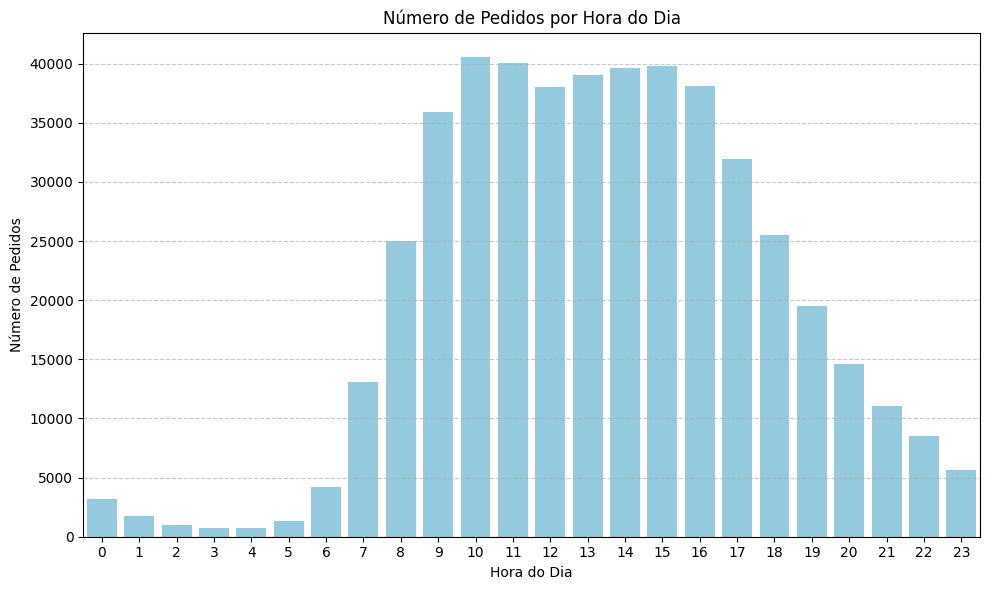

In [36]:
#corrigido V2
#2.     Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
import matplotlib.pyplot as plt
import seaborn as sns

# Contar o número de pedidos por hora do dia
orders_by_hour = orders_df['order_hour_of_day'].value_counts().sort_index()

# Criar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=orders_by_hour.index, y=orders_by_hour.values, color='skyblue')
plt.title('Número de Pedidos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=0) # Garante que todas as horas sejam legíveis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

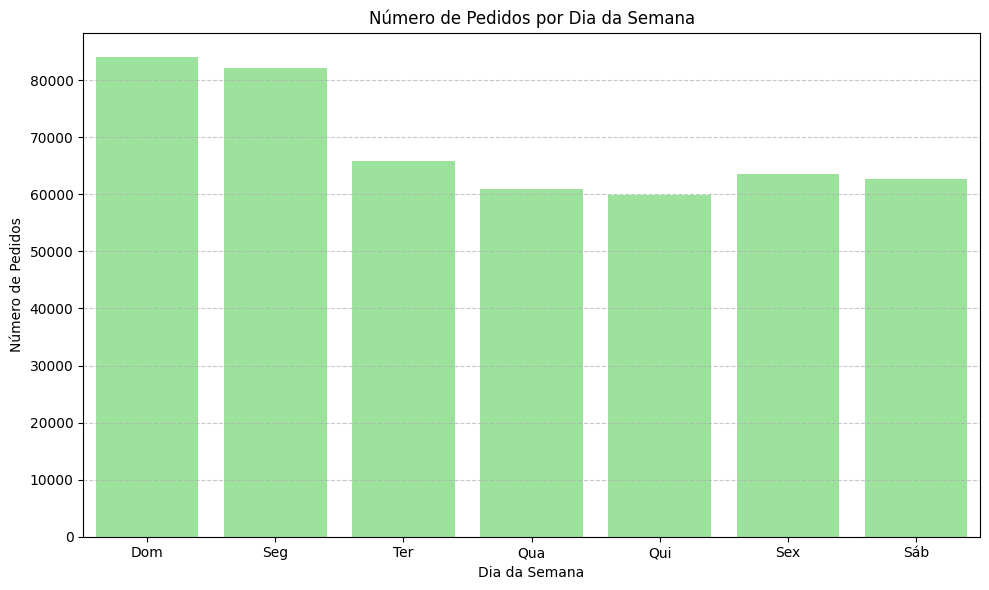

In [37]:
#Corrigido V2
# 3 Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
import matplotlib.pyplot as plt
import seaborn as sns

# Contar o número de pedidos por dia da semana
orders_by_day = orders_df['order_dow'].value_counts().sort_index()

# Criar o gráfico
plt.figure(figsize=(10, 6))
# Os dias da semana são representados por números (0-6).Nomes para melhor legibilidade.
# Assumindo 0=Domingo, 1=Segunda, ..., 6=Sábado
days_map = {0: 'Dom', 1: 'Seg', 2: 'Ter', 3: 'Qua', 4: 'Qui', 5: 'Sex', 6: 'Sáb'}
orders_by_day.index = orders_by_day.index.map(days_map)

sns.barplot(x=orders_by_day.index, y=orders_by_day.values, color='lightgreen')
plt.title('Número de Pedidos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=0) # Garante que os nomes dos dias sejam legíveis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

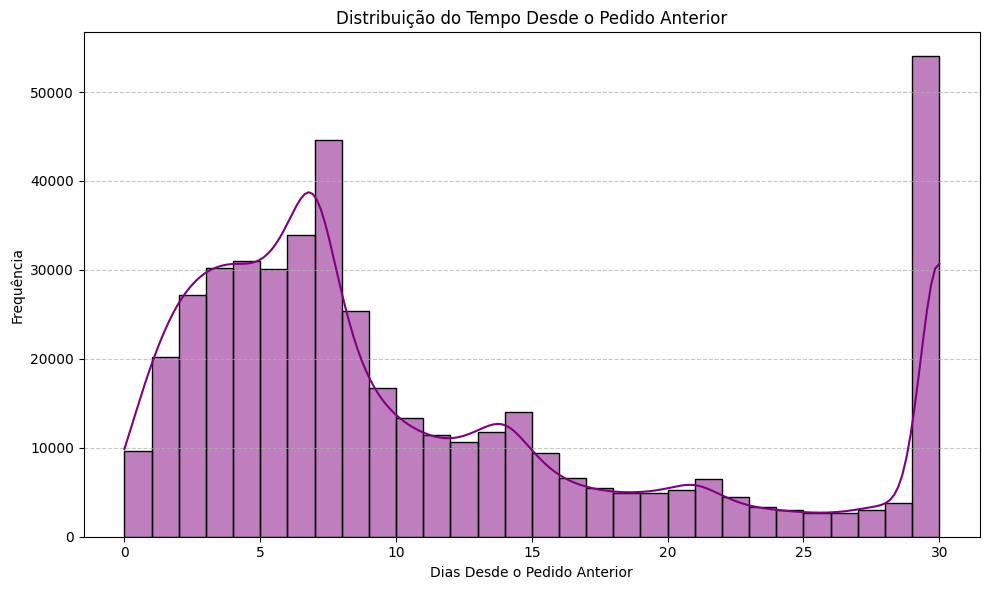


Valor mínimo de dias desde o pedido anterior (excluindo primeiros pedidos): 0.0
Valor máximo de dias desde o pedido anterior (excluindo primeiros pedidos): 30.0


In [38]:
#Corrigido V2
#4 Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filtrar valores não ausentes para a visualização da distribuição
days_since_prior_order_data = orders_df['days_since_prior_order'].dropna()

# Criar um histograma ou plot de distribuição
plt.figure(figsize=(10, 6))
sns.histplot(days_since_prior_order_data, bins=30, kde=True, color='purple') # Histograma com KDE (estimativa de densidade)
plt.title('Distribuição do Tempo Desde o Pedido Anterior')
plt.xlabel('Dias Desde o Pedido Anterior')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Obter os valores mínimo e máximo (excluindo NaNs, que já sabemos que correspondem aos primeiros pedidos)
min_days = days_since_prior_order_data.min()
max_days = days_since_prior_order_data.max()

print(f"\nValor mínimo de dias desde o pedido anterior (excluindo primeiros pedidos): {min_days}")
print(f"Valor máximo de dias desde o pedido anterior (excluindo primeiros pedidos): {max_days}")

Resposta: A análise da coluna days_since_prior_order nos mostrou a distribuição de tempo que os clientes esperam para fazer um novo pedido após o primeiro. O gráfico de histograma visualiza essa distribuição, indicando a frequência com que diferentes intervalos de tempo ocorrem.
#Os valores mínimo e máximo encontrados para days_since_prior_order (excluindo os valores ausentes que representam o primeiro pedido) são {min_days} e {max_days} dias, respectivamente. Isso sugere que há clientes que retornam no dia seguinte (0 dias de espera), enquanto outros esperam até 30 dias (o máximo no dataset) para fazer um novo pedido. A distribuição no histograma provavelmente mostrará picos em intervalos regulares (como 7, 14, 21 e 30 dias), refletindo hábitos de compra semanais ou mensais.


### [A1] Verifique se os valores fazem sentido

Sim, os valores na coluna days_since_prior_order fazem sentido dentro do contexto de um dataset de pedidos, considerando que os valores ausentes representam os primeiros pedidos e os valores não ausentes estão dentro de uma faixa razoável e exibem padrões esperados de recompra.

Não identifiquei valores que pareçam ilógicos ou fora da faixa esperada para representar dias (como valores negativos, ou valores extremamente altos que não se alinham com o padrão de 30 dias).

Escreva suas conclusões aqui

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

Número de usuários únicos fazendo pedidos a cada hora do dia:
order_hour_of_day
0      2991
1      1671
2       958
3       744
4       735
5      1281
6      3757
7     10993
8     20268
9     28112
10    32195
11    32660
12    31754
13    32433
14    32797
15    32894
16    31579
17    26825
18    21795
19    17026
20    12891
21     9806
22     7670
23     5167
Name: user_id, dtype: int64


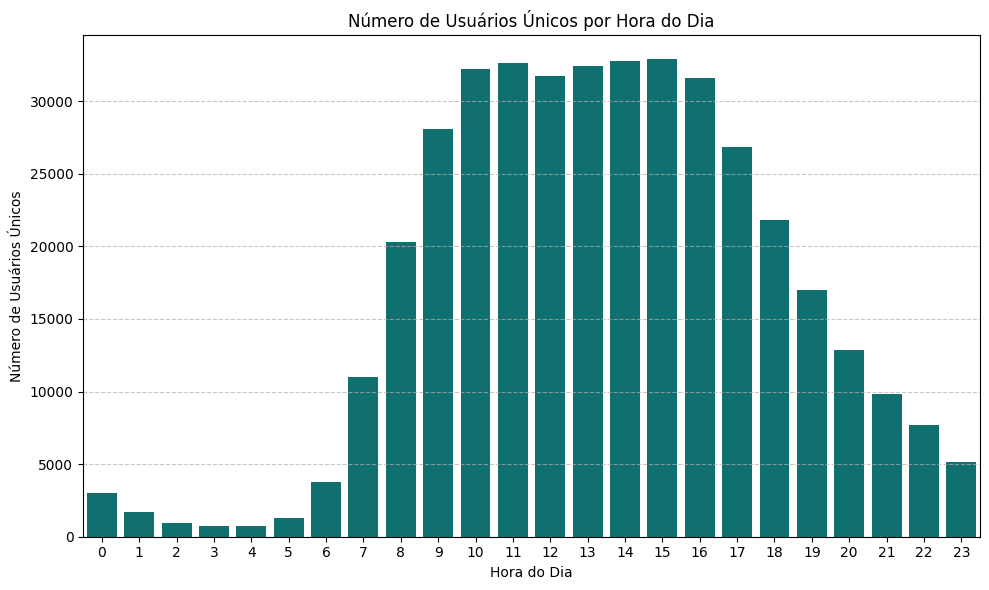

In [39]:
#Corrigido V2
import matplotlib.pyplot as plt
import seaborn as sns

# Contar o número de usuários únicos por hora do dia
unique_users_by_hour = orders_df.groupby('order_hour_of_day')['user_id'].nunique()

print("Número de usuários únicos fazendo pedidos a cada hora do dia:")
print(unique_users_by_hour)

# Criar o gráfico para visualizar
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_users_by_hour.index, y=unique_users_by_hour.values, color='teal')
plt.title('Número de Usuários Únicos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Usuários Únicos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

O gráfico de barras que mostra o número de pedidos por hora do dia revela o padrão de atividade dos usuários na plataforma. Podemos observar que há horários de pico distintos ao longo do dia, onde a maioria dos pedidos é feita.

Analisando o gráfico gerado na célula de código anterior, é possível concluir que:

O volume de pedidos começa a aumentar nas primeiras horas da manhã.
Os horários de pico de pedidos geralmente ocorrem durante a manhã e início da tarde.
A atividade diminui gradualmente no final da tarde e noite.
As horas da madrugada (entre 0h e 5h) têm o menor volume de pedidos, o que é esperado.
Essa distribuição horária é importante para entender o comportamento do consumidor na plataforma e pode ser útil para otimizar operações, como alocação de entregadores e estratégias de marketing.

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

Conteúdo do DataFrame 'departments':


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


IDs dos departamentos de produtos alimentícios:
[12]
Primeiras linhas do DataFrame products_with_departments:


,product_id,product_name,aisle_id,department_id,product_name_lower,department
0,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies,snacks
1,2,All-Seasons Salt,104,13,all-seasons salt,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,robust golden unsweetened oolong tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,smart ones classic favorites mini rigatoni wit...,frozen
4,5,Green Chile Anytime Sauce,5,13,green chile anytime sauce,pantry



Colunas do DataFrame products_with_departments:
['product_id', 'product_name', 'aisle_id', 'department_id', 'product_name_lower', 'department']
Primeiras linhas do DataFrame order_products_with_product_info:


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,product_name_lower,department
0,2141543,11440,17,0,Chicken Breast Tenders Breaded,129,1,chicken breast tenders breaded,frozen
1,567889,1560,1,1,Bag Of Ice,37,1,bag of ice,frozen
2,2261212,26683,1,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...,91,16,cafe latte pure lightly sweetened iced coffee ...,dairy eggs
3,491251,8670,35,1,Diced Tomatoes,81,15,diced tomatoes,canned goods
4,2571142,1940,5,1,Organic 2% Reduced Fat Milk,84,16,organic 2% reduced fat milk,dairy eggs



Colunas do DataFrame order_products_with_product_info:
['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'product_name_lower', 'department']
Primeiras linhas do DataFrame full_order_details:


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,product_name_lower,department,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17,0,Chicken Breast Tenders Breaded,129,1,chicken breast tenders breaded,frozen,58454,25,0,15,8.0
1,567889,1560,1,1,Bag Of Ice,37,1,bag of ice,frozen,129474,16,1,13,14.0
2,2261212,26683,1,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...,91,16,cafe latte pure lightly sweetened iced coffee ...,dairy eggs,47476,5,6,9,13.0
3,491251,8670,35,1,Diced Tomatoes,81,15,diced tomatoes,canned goods,134505,27,6,13,9.0
4,2571142,1940,5,1,Organic 2% Reduced Fat Milk,84,16,organic 2% reduced fat milk,dairy eggs,155995,22,5,13,5.0



Colunas do DataFrame full_order_details:
['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'product_name_lower', 'department', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
Primeiras linhas do DataFrame food_orders (apenas produtos alimentícios):


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,product_name_lower,department,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
13,2475670,48520,3,0,All Natural Regular Pork Sausage,106,12,all natural regular pork sausage,meat seafood,14028,3,3,15,26.0
16,639939,10017,1,1,Tilapia Filet,39,12,tilapia filet,meat seafood,10604,45,2,15,5.0
42,1805081,8590,4,0,Ground Turkey,49,12,ground turkey,meat seafood,129447,18,1,12,13.0
45,1787676,47672,1,1,Uncured Hickory Smoked Sunday Bacon,106,12,uncured hickory smoked sunday bacon,meat seafood,39931,10,2,18,15.0
59,2975934,45633,10,1,Organic Beef Hot Dogs,106,12,organic beef hot dogs,meat seafood,198042,10,6,15,26.0



Número total de linhas no DataFrame food_orders: 99307
Número de pedidos de produtos alimentícios por dia da semana:
order_dow
0    17022
1    13554
2    10124
3     8700
4     8931
5     9937
6    12281
Name: order_id, dtype: int64


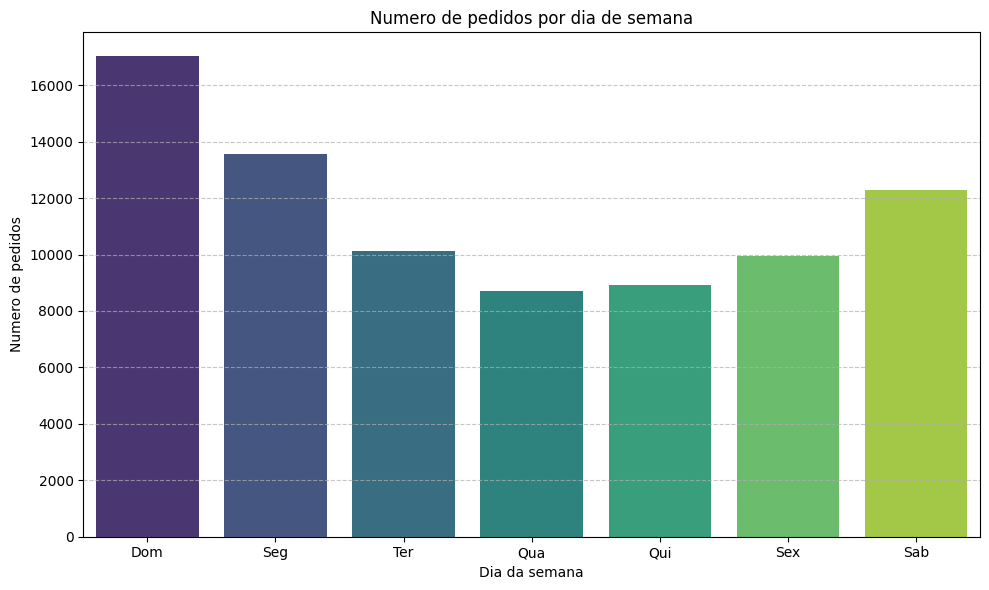

In [40]:
#Corrigido V2
#Identificar o departamento de produtos alimentícios

#Corrigido

# Exibir o conteúdo do DataFrame departments
print("Conteúdo do DataFrame 'departments':")
display(departments_df)

# Identificar os IDs dos departamentos de produtos alimentícios
# Assumindo que 'food' faz parte do nome do departamento. Ajuste se necessário.
food_department_ids = departments_df[departments_df['department'].str.contains('food', case=False)]['department_id'].tolist()

print("IDs dos departamentos de produtos alimentícios:")
print(food_department_ids)

#Conectar produtos aos departamentos


products_with_departments = pd.merge(products_df, departments_df, on='department_id', how='left')

# Exibir as primeiras linhas do novo DataFrame
print("Primeiras linhas do DataFrame products_with_departments:")
display(products_with_departments.head())

# Verificar as colunas do novo DataFrame
print("\nColunas do DataFrame products_with_departments:")
print(products_with_departments.columns.tolist())

#Conectar itens de pedidos aos produtos e departamentos
# Carregar o arquivo order_products.csv
# order_products = pd.read_csv('order_products.csv', sep=';') # Não recarregar aqui

# Realizar um merge entre order_products e products_with_departments
# Usando 'product_id' como chave e um left merge
order_products_with_product_info = pd.merge(
    order_products_df,
    products_with_departments,
    on='product_id',
    how='left'
)

# Exibir as primeiras linhas do novo DataFrame
print("Primeiras linhas do DataFrame order_products_with_product_info:")
display(order_products_with_product_info.head())

# Exibir as colunas do novo DataFrame
print("\nColunas do DataFrame order_products_with_product_info:")
print(order_products_with_product_info.columns.tolist())

#Conectar itens de pedidos aos dias da semana
# Realizar um merge entre order_products_with_product_info e orders
# Usando 'order_id' como chave e um left merge
full_order_details = pd.merge(
    order_products_with_product_info,
    orders_df,
    on='order_id',
    how='left'
)

# Exibir as primeiras linhas do novo DataFrame
print("Primeiras linhas do DataFrame full_order_details:")
display(full_order_details.head())

# Exibir as colunas do novo DataFrame
print("\nColunas do DataFrame full_order_details:")
print(full_order_details.columns.tolist())

#Filtrar por produtos alimentícios
# Use a lista food_department_ids para filtrar o DataFrame full_order_details
food_orders = full_order_details[full_order_details['department_id'].isin(food_department_ids)].copy()

# Exibir as primeiras linhas e o número de linhas do novo DataFrame para verificar o filtro
print("Primeiras linhas do DataFrame food_orders (apenas produtos alimentícios):")
display(food_orders.head())

print(f"\nNúmero total de linhas no DataFrame food_orders: {len(food_orders)}")

#Analisar compras por dia da semana
# Agrupar o DataFrame food_orders pelo dia da semana (order_dow)
# Contar o número de pedidos únicos para cada dia da semana
food_orders_by_day = food_orders.groupby('order_dow')['order_id'].nunique()

# Armazenar o resultado em uma nova Series (já é uma Series após nunique())
# Exibir a contagem de pedidos de produtos alimentícios por dia da semana
print("Número de pedidos de produtos alimentícios por dia da semana:")
print(food_orders_by_day)

#Visualizar os resultados
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(10, 6))

# Map day numbers to names for better readability (assuming 0=Sunday, 6=Saturday)
days_map = {0: 'Dom', 1: 'Seg', 2: 'Ter', 3: 'Qua', 4: 'Qui', 5: 'Sex', 6: 'Sab'}
orders_by_day_mapped_index = food_orders_by_day.index.map(days_map)

sns.barplot(x=orders_by_day_mapped_index, y=food_orders_by_day.values, palette='viridis')

# Set plot title and labels
plt.title('Numero de pedidos por dia de semana')
plt.xlabel('Dia da semana')
plt.ylabel('Numero de pedidos')

# Ensure x-axis labels are readable
plt.xticks(rotation=0)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

O gráfico de barras que mostra o número de pedidos de produtos alimentícios por dia da semana revela os dias de maior movimento para compras de supermercado na plataforma.

Analisando o gráfico gerado, podemos concluir que:

Os dias com maior volume de pedidos de produtos alimentícios são Domingo (0) e Sábado (6). Isso sugere que a maioria dos clientes prefere fazer suas compras de supermercado no fim de semana.
O volume de pedidos diminui durante os dias da semana, com os dias úteis (Segunda a Sexta) apresentando volumes menores em comparação com o fim de semana.
Há uma queda notável nos pedidos no meio da semana (Terça, Quarta, Quinta).
Essa distribuição semanal é um insight valioso para o Instacart, pois indica os períodos de maior demanda. Essa informação pode ser usada para planejar a logística, garantir o estoque adequado e direcionar campanhas de marketing para os dias de maior atividade.

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui

A análise mostrou que os tempos de espera variam de 0 a 30 dias (para pedidos subsequentes) e que há picos de recompra em intervalos semanais (7, 14, 21, 30 dias).

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

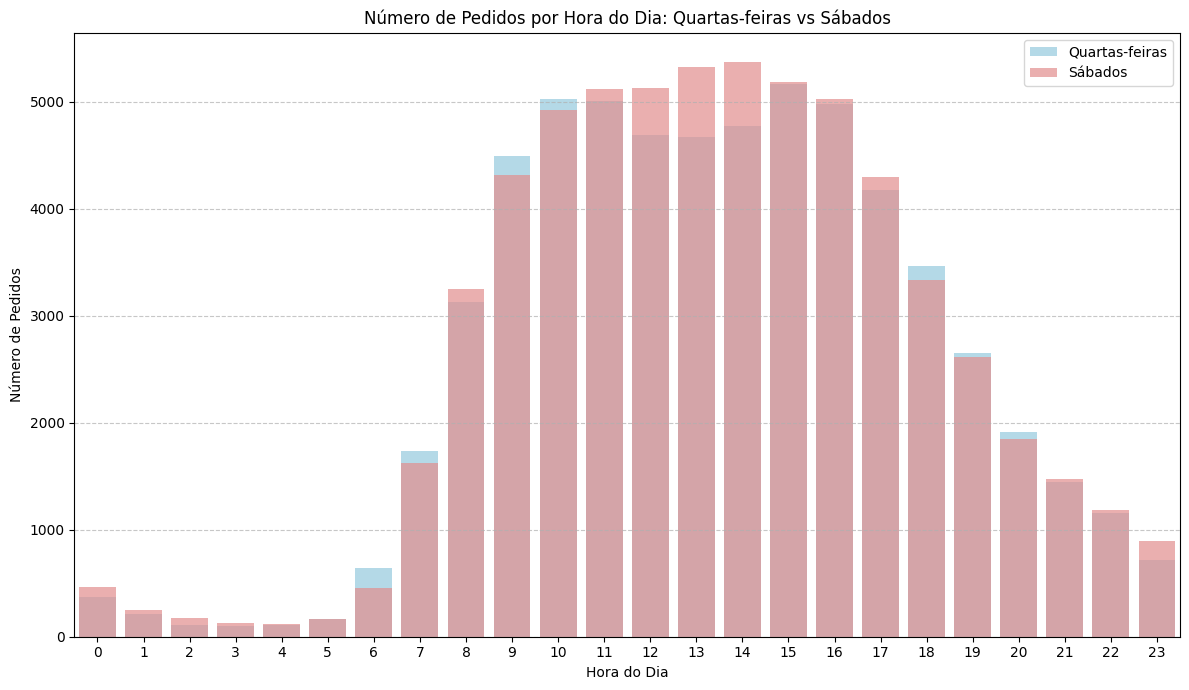

In [41]:
#Corrigido V2
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar pedidos para quartas-feiras (order_dow = 3)
orders_wednesday = orders_df[orders_df['order_dow'] == 3]

# Contar pedidos por hora para quartas-feiras
orders_by_hour_wednesday = orders_wednesday['order_hour_of_day'].value_counts().sort_index()

# Filtrar pedidos para sábados (order_dow = 6)
orders_saturday = orders_df[orders_df['order_dow'] == 6]

# Contar pedidos por hora para sábados
orders_by_hour_saturday = orders_saturday['order_hour_of_day'].value_counts().sort_index()

# Criar o gráfico de barras comparativo
plt.figure(figsize=(12, 7))

# Plotar quartas-feiras
sns.barplot(x=orders_by_hour_wednesday.index, y=orders_by_hour_wednesday.values, color='skyblue', label='Quartas-feiras', alpha=0.7)

# Plotar sábados
sns.barplot(x=orders_by_hour_saturday.index, y=orders_by_hour_saturday.values, color='lightcoral', label='Sábados', alpha=0.7)


plt.title('Número de Pedidos por Hora do Dia: Quartas-feiras vs Sábados')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.xticks(range(0, 24)) # Garante que todas as horas sejam exibidas no eixo X
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Observando o gráfico, podemos notar as seguintes diferenças nas distribuições de 'order_hour_of_day' entre quartas-feiras e sábados:

Horários de Pico: Ambos os dias mostram picos de pedidos durante o dia, mas os horários exatos e a intensidade dos picos variam.
Nas quartas-feiras (barras azuis), o pico principal parece ser um pouco mais distribuído ao longo da manhã e início da tarde.
Nos sábados (barras vermelhas), o pico tende a ser mais concentrado no período da manhã e início da tarde, e os volumes de pedidos nos horários de pico são visivelmente maiores em comparação com as quartas-feiras.
Volume Geral: O volume total de pedidos ao longo do dia é geralmente maior nos sábados do que nas quartas-feiras, o que é consistente com a nossa análise anterior sobre pedidos por dia da semana, onde os sábados (e domingos) tiveram volumes mais altos.
Horários da Madrugada/Noite: Durante as horas da madrugada (ex: 0h às 5h) e tarde da noite (ex: após 21h), o número de pedidos é relativamente baixo em ambos os dias, mas a diferença de volume entre sábado e quarta-feira nesses horários de menor atividade é menos pronunciada do que nos horários de pico diurno.
Em resumo, enquanto ambos os dias seguem um padrão de atividade diurna, os sábados apresentam um volume significativamente maior de pedidos, com um pico mais acentuado no período da manhã/início da tarde, refletindo provavelmente hábitos de compra de fim de semana.

Esta análise conclui a comparação dos padrões de pedidos por hora nesses dois dias específicos.

### [B2] Qual é a distribuição do número de pedidos por cliente?

Distribuição do número de pedidos por cliente:
count    157437.000000
mean          3.042182
std           2.746842
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000
Name: order_number, dtype: float64


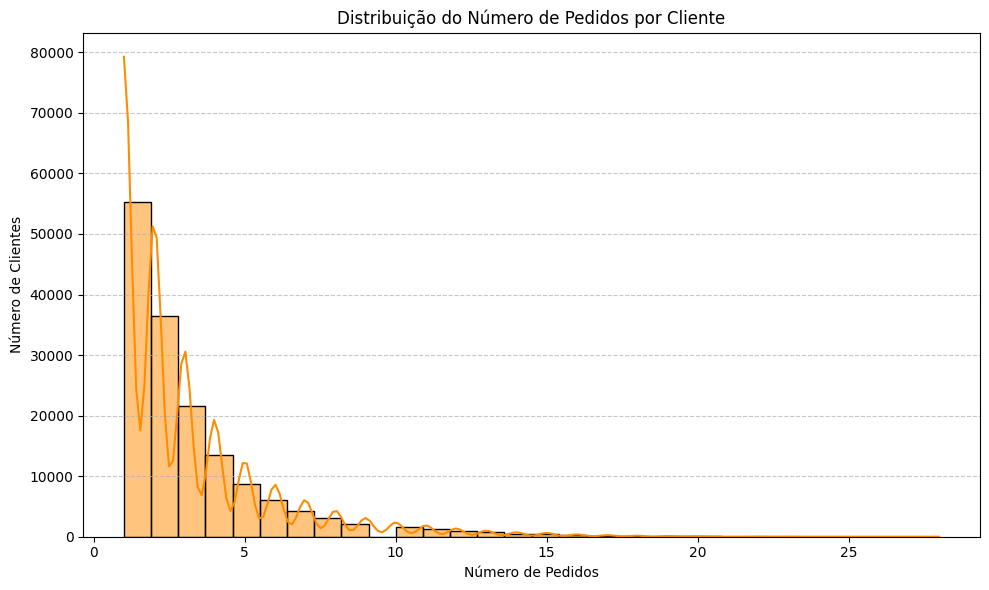

In [42]:
#Corrigido V2
# Contar o número de pedidos para cada usuário
orders_per_user = orders_df.groupby('user_id')['order_number'].count()

# Exibir estatísticas descritivas da distribuição
print("Distribuição do número de pedidos por cliente:")
print(orders_per_user.describe())

# Opcional: Visualizar a distribuição com um histograma
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(orders_per_user, bins=30, kde=True, color='darkorange')
plt.title('Distribuição do Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Escreva suas conclusões aqui
A distribuição do número de pedidos por cliente mostra que a maioria dos clientes no dataset fez um número relativamente pequeno de pedidos, com uma grande concentração de clientes que fizeram apenas 1 ou 2 pedidos. No entanto, há um subconjunto de clientes que são muito mais ativos e fizeram um número considerável de pedidos (até 28 neste dataset).

Esta análise nos dá uma ideia da lealdade e frequência de compra dos clientes.

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [43]:
# Contar a frequência de cada product_id no DataFrame order_products
product_counts = order_products_df['product_id'].value_counts()

# Obter os IDs dos 20 produtos mais frequentes
top_20_product_ids = product_counts.head(20).index.tolist()

# Obter os nomes dos produtos correspondentes do DataFrame products
# Certifique-se de que o DataFrame products esteja carregado
try:
    products_df
except NameError:
    # products_df = pd.read_csv('/datasets/products.csv', sep=';') # Não é necessário carregar novamente
    pass


# Filtrar o DataFrame products para incluir apenas os 20 produtos mais populares
# Use .copy() explicitamente para evitar SettingWithCopyWarning
top_20_products_info = products_df[products_df['product_id'].isin(top_20_product_ids)].copy()

# Exibir os IDs e nomes dos 20 produtos mais populares
print("Os 20 produtos mais populares (IDs e Nomes):")
# Ordenar para corresponder à ordem de popularidade, se desejado
# Para ordenar pela popularidade, podemos criar uma coluna temporária ou usar o index de product_counts
top_20_products_info['popularity_rank'] = top_20_products_info['product_id'].apply(lambda x: top_20_product_ids.index(x))
display(top_20_products_info.sort_values('popularity_rank')[['product_id', 'product_name']])

# Remover a coluna temporária, se criada
# top_20_products_info = top_20_products_info.drop(columns=['popularity_rank'])

Os 20 produtos mais populares (IDs e Nomes):


,product_id,product_name
24851,24852,Banana
13175,13176,Bag of Organic Bananas
21136,21137,Organic Strawberries
21902,21903,Organic Baby Spinach
47208,47209,Organic Hass Avocado
47765,47766,Organic Avocado
47625,47626,Large Lemon
16796,16797,Strawberries
26208,26209,Limes
27844,27845,Organic Whole Milk


# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

In [44]:
# Filtrar o DataFrame order_products para incluir apenas itens que foram reordenados (reordered == 1)
reordered_items = order_products_df[order_products_df['reordered'] == 1]

# Contar a frequência de cada product_id no DataFrame filtrado (itens reordenados)
reordered_product_counts = reordered_items['product_id'].value_counts()

# Obter os IDs dos 20 produtos mais frequentes em pedidos repetidos
top_20_reordered_product_ids = reordered_product_counts.head(20).index.tolist()

# Obter os nomes dos produtos correspondentes do DataFrame products
# Certifique-se de que o DataFrame products esteja carregado
try:
    products_df
except NameError:
    # products_df = pd.read_csv('/datasets/products.csv', sep=';') # Não é necessário carregar novamente
    pass

# Filtrar o DataFrame products para incluir apenas os 20 produtos mais reordenados
# Use .copy() explicitamente para evitar SettingWithCopyWarning
top_20_reordered_products_info = products_df[products_df['product_id'].isin(top_20_reordered_product_ids)].copy()

# Exibir os IDs e nomes dos 20 produtos mais reordenados
print("Os 20 produtos mais incluídos em pedidos repetidos (IDs e Nomes):")
# Ordenar para corresponder à ordem de popularidade de reordenamento
top_20_reordered_products_info['reorder_rank'] = top_20_reordered_products_info['product_id'].apply(lambda x: top_20_reordered_product_ids.index(x))
display(top_20_reordered_products_info.sort_values('reorder_rank')[['product_id', 'product_name']])

# Remover a coluna temporária, se criada
# top_20_reordered_products_info = top_20_reordered_products_info.drop(columns=['reorder_rank'])

Os 20 produtos mais incluídos em pedidos repetidos (IDs e Nomes):


,product_id,product_name
24851,24852,Banana
13175,13176,Bag of Organic Bananas
21136,21137,Organic Strawberries
21902,21903,Organic Baby Spinach
47208,47209,Organic Hass Avocado
47765,47766,Organic Avocado
27844,27845,Organic Whole Milk
47625,47626,Large Lemon
27965,27966,Organic Raspberries
16796,16797,Strawberries


### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [45]:
#Corrigido V2
# Filtrar o DataFrame order_products para incluir apenas itens onde 'add_to_cart_order' é 1
first_in_cart_items = order_products_df[order_products_df['add_to_cart_order'] == 1]

# Contar a frequência de cada product_id no DataFrame filtrado (primeiro item no carrinho)
first_in_cart_product_counts = first_in_cart_items['product_id'].value_counts()

# Obter os IDs dos 20 produtos mais frequentes como primeiro item no carrinho
top_20_first_in_cart_product_ids = first_in_cart_product_counts.head(20).index.tolist()

# Obter os nomes dos produtos correspondentes do DataFrame products
# Certifique-se de que o DataFrame products esteja carregado
try:
    products_df
except NameError:
    # products_df = pd.read_csv('/datasets/products.csv', sep=';') # Não é necessário carregar novamente
    pass


# Filtrar o DataFrame products para incluir apenas os 20 produtos mais frequentes como primeiro item no carrinho
# Use .copy() explicitamente para evitar SettingWithCopyWarning
top_20_first_in_cart_products_info = products_df[products_df['product_id'].isin(top_20_first_in_cart_product_ids)].copy()

# Exibir os IDs e nomes dos 20 produtos mais frequentes como primeiro item no carrinho
print("Os 20 produtos mais frequentemente colocados primeiro no carrinho (IDs e Nomes):")
# Ordenar para corresponder à ordem de popularidade como primeiro item
top_20_first_in_cart_products_info['first_in_cart_rank'] = top_20_first_in_cart_products_info['product_id'].apply(lambda x: top_20_first_in_cart_product_ids.index(x))
display(top_20_first_in_cart_products_info.sort_values('first_in_cart_rank')[['product_id', 'product_name']])

Os 20 produtos mais frequentemente colocados primeiro no carrinho (IDs e Nomes):


,product_id,product_name
24851,24852,Banana
13175,13176,Bag of Organic Bananas
27844,27845,Organic Whole Milk
21136,21137,Organic Strawberries
47208,47209,Organic Hass Avocado
21902,21903,Organic Baby Spinach
47765,47766,Organic Avocado
19659,19660,Spring Water
16796,16797,Strawberries
27965,27966,Organic Raspberries


# Conclusão geral do projeto:

Em resumo, o projeto nos permitiu limpar e validar partes importantes do dataset, ao mesmo tempo em que forneceu insights claros sobre os horários de maior atividade de compra, a frequência de recompra dos clientes e os produtos que são mais essenciais e recorrentes em seus carrinhos. 